In [1]:
import json
from tqdm import tqdm

def load_jsonl_to_memory(filepath, fraction=20):
    # Determine the total number of lines to calculate the size of the fraction
    with open(filepath, 'r', encoding='utf-8') as file:
        total_lines = sum(1 for _ in file)
    
    # Calculate the number of lines to process based on the fraction
    lines_to_process = total_lines // fraction
    
    # Preallocate the list with None values for the fraction of data
    data = [None] * lines_to_process
    
    with open(filepath, 'r', encoding='utf-8') as file:
        processed_lines = 0  # Keep track of how many lines have been processed
        for index, line in enumerate(tqdm(file, total=total_lines, desc="Processing")):
            if index % fraction == 0:  # Process only every fraction-th line
                # Parse the JSON content from the line and add it to the data list
                data[processed_lines] = json.loads(line)
                processed_lines += 1
                if processed_lines >= lines_to_process:
                    break  # Stop if we've processed the intended number of lines
    
    return data

data = load_jsonl_to_memory('/mnt/datassd/processed_file.jsonl')

Processing: 100%|█████████▉| 53209620/53209647 [00:16<00:00, 3174278.73it/s]


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'data' is your list of dictionaries
titles = [item['title'] for item in data]
view_counts = np.array([item['view_count'] for item in data])

# Parameters for tokenization and padding
vocab_size = 10000  # Adjust based on your dataset
max_length = 100  # Adjust based on the length of your titles
padding_type = 'post'
trunc_type = 'post'

# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(titles)

# Convert titles to sequences and pad them
sequences = tokenizer.texts_to_sequences(titles)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, view_counts, test_size=0.2, random_state=42)



2024-03-07 01:30:36.184819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 01:30:36.184856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 01:30:36.194593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 01:30:36.251486: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 01:30:37.325760: W tensorflow/compiler/tf2

/tmp/ipykernel_41845/3854255208.py:5: RuntimeWarning: divide by zero encountered in log
  y_test_log = np.log(y_test)


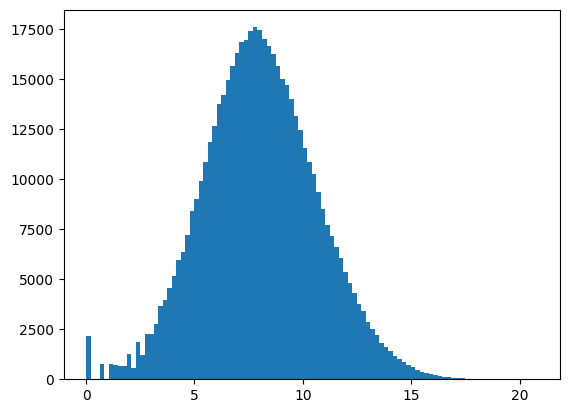

In [8]:
# Histogram Y_test
import matplotlib.pyplot as plt

# Log of y_test
y_test_log = np.log(y_test)
y_test_log = np.where(y_test_log == -np.inf, 0, y_test_log)


plt.hist(y_test_log, bins=100)
plt.show()

/tmp/ipykernel_41845/2781598701.py:1: RuntimeWarning: divide by zero encountered in log
  y_train_log = np.log(y_train)


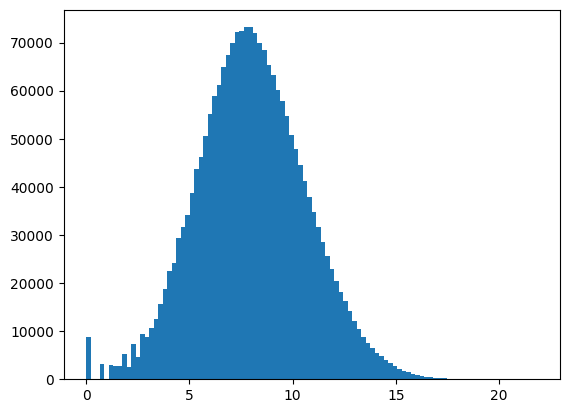

In [9]:
y_train_log = np.log(y_train)
y_train_log = np.where(y_train_log == -np.inf, 0, y_train_log)

plt.hist(y_train_log, bins=100)
plt.show()

array([[ 551, 1401,   10, ...,    0,    0,    0],
       [3897,   14,    1, ...,    0,    0,    0],
       [2521, 5992,  353, ...,    0,    0,    0],
       ...,
       [   1,    4,    6, ...,    0,    0,    0],
       [  80,   24,  212, ...,    0,    0,    0],
       [   1, 1709, 1685, ...,    0,    0,    0]], dtype=int32)